In [1]:
#Import Data

import pandas as pd
import matplotlib.pyplot as plt

econ_freedom = pd.read_csv("economic_freedom_index2019_data.csv",encoding='latin-1', index_col = "Country")
gender_development = pd.read_csv("gender_development.csv",index_col = "Country")
gender_inequality = pd.read_csv("gender_inequality.csv",index_col = "Country")
historical_index = pd.read_csv("historical_index.csv",index_col = "Country")
human_development = pd.read_csv("human_development.csv",index_col = "Country")
inequality = pd.read_csv("inequality_adjusted.csv",index_col = "Country")
poverty = pd.read_csv("multidimensional_poverty.csv",index_col = "Country")


In [2]:
#Reconcile country names 

def UpdateCountry(df, old, new):
    df.loc[new] = historical_index.loc[old].values
    df = df.drop(old)
    return df

historical_index = UpdateCountry(historical_index,"Hong Kong, China (SAR)","Hong Kong SAR")
historical_index = UpdateCountry(historical_index,"Viet Nam","Vietnam")
historical_index = UpdateCountry(historical_index,"Congo","Congo, Democratic Republic of the Congo")
historical_index = UpdateCountry(historical_index,"Kyrgyzstan","Kyrgyz Republic")
historical_index = UpdateCountry(historical_index,"Lao People's Democratic Republic","Lao P.D.R.")
historical_index = UpdateCountry(historical_index,"Moldova (Republic of)","Moldova")
historical_index = UpdateCountry(historical_index,"Russian Federation","Russia")
historical_index = UpdateCountry(historical_index,"Slovakia","Slovak Republic")
historical_index = UpdateCountry(historical_index,"Tanzania (United Republic of)","Tanzania")
historical_index = UpdateCountry(historical_index,"Venezuela (Bolivarian Republic of)","Venezuela") 
historical_index = UpdateCountry(historical_index,"Bolivia (Plurinational State of)","Bolivia") 


In [3]:
#Column pre-processing

#shortening column names to make them more managable
historical_index = historical_index.rename(columns = {"Human Development Index (1990)":"1990","Human Development Index (2000)":"2000","Human Development Index (2010)":"2010",
                            "Human Development Index (2011)":"2011","Human Development Index (2012)":"2012","Human Development Index (2013)":"2013","Human Development Index (2014)":"2014"})
#updating column data types
for col in historical_index:
    historical_index[col] = historical_index[col].replace("..", 0)
    historical_index[col] = historical_index[col].astype(float)                                                                                                   

#cleaning up miscellaneous text 
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].astype(str)
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace('$','').str.replace(',','')
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("2015 est.","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("CHF.","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("(2014 )","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace("(","")
econ_freedom["GDP (Billions, PPP)"] = econ_freedom["GDP (Billions, PPP)"].str.replace(")","")
econ_freedom["GDP (Billions, PPP)"] =  econ_freedom["GDP (Billions, PPP)"].astype(float)                                                                                                   


In [4]:
#remove rows with missing required data
historical_index = historical_index[(historical_index["2014"] != 0) & (historical_index["1990"] != 0)]

#calculate percent change
historical_index["Percent_Change"] = (historical_index["2014"] - historical_index["1990"])/historical_index["1990"]  

In [5]:
#Join data sets
econ_vs_hdi = pd.merge(econ_freedom, historical_index, how='outer', on = "Country")[["5 Year GDP Growth Rate (%)","Percent_Change","HDI Rank","GDP (Billions, PPP)"]]
econ_vs_hdi

,5 Year GDP Growth Rate (%),Percent_Change,HDI Rank,"GDP (Billions, PPP)"
Country,,,,
Afghanistan,2.9,0.565657,171.0,69.6
Albania,2.5,0.174679,85.0,36.0
Algeria,3.1,0.282230,83.0,632.9
Angola,2.9,NaN,NaN,190.3
Argentina,0.7,0.185816,40.0,920.2
...,...,...,...,...
Europe and Central Asia,NaN,0.149002,NaN,NaN
Latin America and the Caribbean,NaN,0.196800,NaN,NaN
South Asia,NaN,0.389016,NaN,NaN


Text(0, 0.5, 'GDP (Billions)')

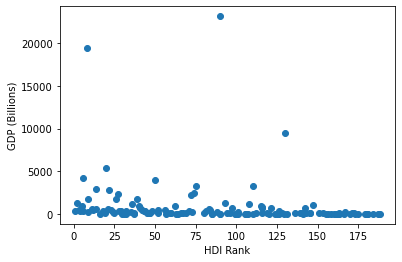

In [6]:
#Plot GDP vs. HDI Rank - Not very interesting
econ_vs_hdi.dtypes
plt.scatter(econ_vs_hdi["HDI Rank"],econ_vs_hdi["GDP (Billions, PPP)"])
plt.xlabel("HDI Rank")
plt.ylabel("GDP (Billions)")

In [7]:
#Group countries by HDI Ranking (different HDI ranges because some rows are missing with the merged dataset)

econ_vs_hdi_1 = econ_vs_hdi[econ_vs_hdi["HDI Rank"] <= 25]
econ_vs_hdi_2 = econ_vs_hdi[(econ_vs_hdi["HDI Rank"] >25) & (econ_vs_hdi["HDI Rank"] <= 50)]
econ_vs_hdi_3 = econ_vs_hdi[(econ_vs_hdi["HDI Rank"] >50) & (econ_vs_hdi["HDI Rank"] <= 75)]
econ_vs_hdi_4 = econ_vs_hdi[(econ_vs_hdi["HDI Rank"] >75) & (econ_vs_hdi["HDI Rank"] <= 100)]
econ_vs_hdi_5 = econ_vs_hdi[(econ_vs_hdi["HDI Rank"] >100) & (econ_vs_hdi["HDI Rank"] <=125)]
econ_vs_hdi_6 = econ_vs_hdi[(econ_vs_hdi["HDI Rank"] >125) & (econ_vs_hdi["HDI Rank"] <=150)]
econ_vs_hdi_7 = econ_vs_hdi[econ_vs_hdi["HDI Rank"] >150]


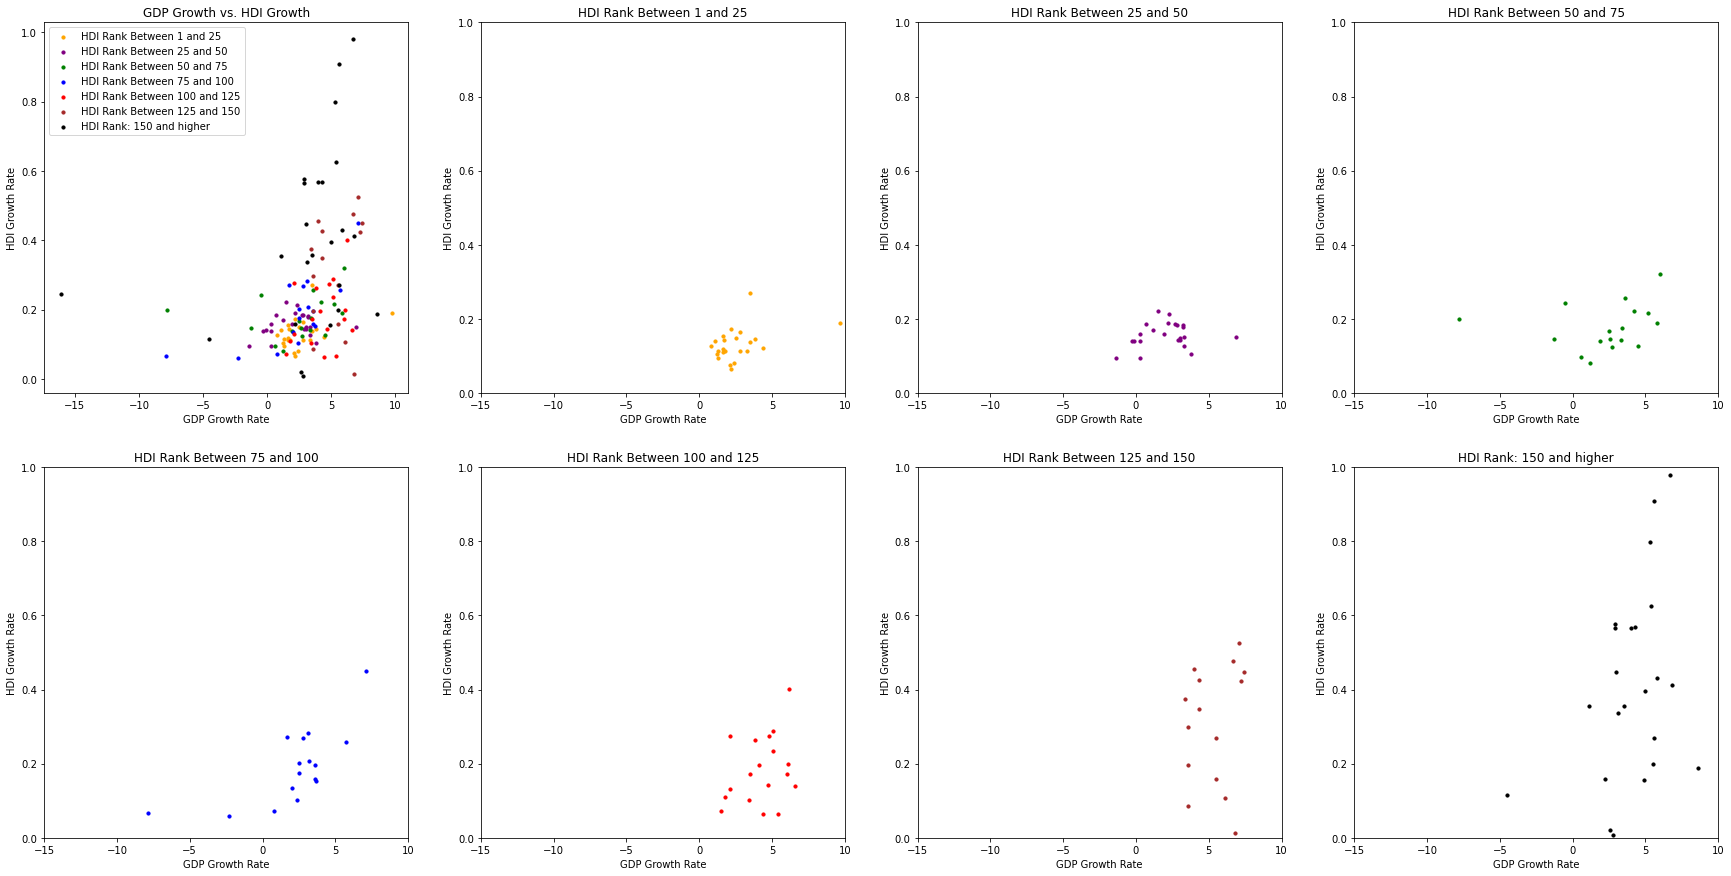

In [8]:
#Plot GDP Growth vs. HDI Growth
ttl1 = "HDI Rank Between 1 and 25"
ttl2 = "HDI Rank Between 25 and 50"
ttl3 = "HDI Rank Between 50 and 75"
ttl4 = "HDI Rank Between 75 and 100"
ttl5 = "HDI Rank Between 100 and 125"
ttl6 = "HDI Rank Between 125 and 150"
ttl7 = "HDI Rank: 150 and higher"

fig = plt.figure(figsize=(30, 15))
plt.axis((-15,10,0,1))

plt.subplot(2,4,1)
plt.scatter(econ_vs_hdi_1["5 Year GDP Growth Rate (%)"],econ_vs_hdi_1["Percent_Change"], color = 'orange',s = 10,label = ttl1)
plt.scatter(econ_vs_hdi_2["5 Year GDP Growth Rate (%)"],econ_vs_hdi_2["Percent_Change"], color = 'purple',s = 10, label = ttl2)
plt.scatter(econ_vs_hdi_3["5 Year GDP Growth Rate (%)"],econ_vs_hdi_3["Percent_Change"], color = 'green',s = 10,label = ttl3)
plt.scatter(econ_vs_hdi_4["5 Year GDP Growth Rate (%)"],econ_vs_hdi_4["Percent_Change"], color = 'blue',s = 10,label = ttl4)
plt.scatter(econ_vs_hdi_5["5 Year GDP Growth Rate (%)"],econ_vs_hdi_5["Percent_Change"], color = 'red',s = 10,label = ttl5)
plt.scatter(econ_vs_hdi_6["5 Year GDP Growth Rate (%)"],econ_vs_hdi_6["Percent_Change"], color = 'brown',s = 10,label = ttl6)
plt.scatter(econ_vs_hdi_7["5 Year GDP Growth Rate (%)"],econ_vs_hdi_7["Percent_Change"], color = 'black',s = 10,label = ttl7)
plt.legend(loc = 'upper left')
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.title("GDP Growth vs. HDI Growth")

plt.subplot(2,4,2)
plt.axis((-15,10,0,1))
plt.title(ttl1)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_1["5 Year GDP Growth Rate (%)"],econ_vs_hdi_1["Percent_Change"], color = 'orange',s = 10)

plt.subplot(2,4,3)
plt.axis((-15,10,0,1))
plt.title(ttl2)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_2["5 Year GDP Growth Rate (%)"],econ_vs_hdi_2["Percent_Change"], color = 'purple',s = 10)

plt.subplot(2,4,4)
plt.axis((-15,10,0,1))
plt.title(ttl3)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_3["5 Year GDP Growth Rate (%)"],econ_vs_hdi_3["Percent_Change"], color = 'green',s = 10)

plt.subplot(2,4,5)
plt.axis((-15,10,0,1))
plt.title(ttl4)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_4["5 Year GDP Growth Rate (%)"],econ_vs_hdi_4["Percent_Change"], color = 'blue',s = 10)

plt.subplot(2,4,6)
plt.axis((-15,10,0,1))
plt.title(ttl5)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_5["5 Year GDP Growth Rate (%)"],econ_vs_hdi_5["Percent_Change"], color = 'red',s = 10)

plt.subplot(2,4,7)
plt.axis((-15,10,0,1))
plt.title(ttl6)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_6["5 Year GDP Growth Rate (%)"],econ_vs_hdi_6["Percent_Change"], color = 'brown',s = 10)

plt.subplot(2,4,8)
plt.axis((-15,10,0,1))
plt.title(ttl7)
plt.xlabel("GDP Growth Rate")
plt.ylabel("HDI Growth Rate")
plt.scatter(econ_vs_hdi_7["5 Year GDP Growth Rate (%)"],econ_vs_hdi_7["Percent_Change"], color = 'black',s = 10)


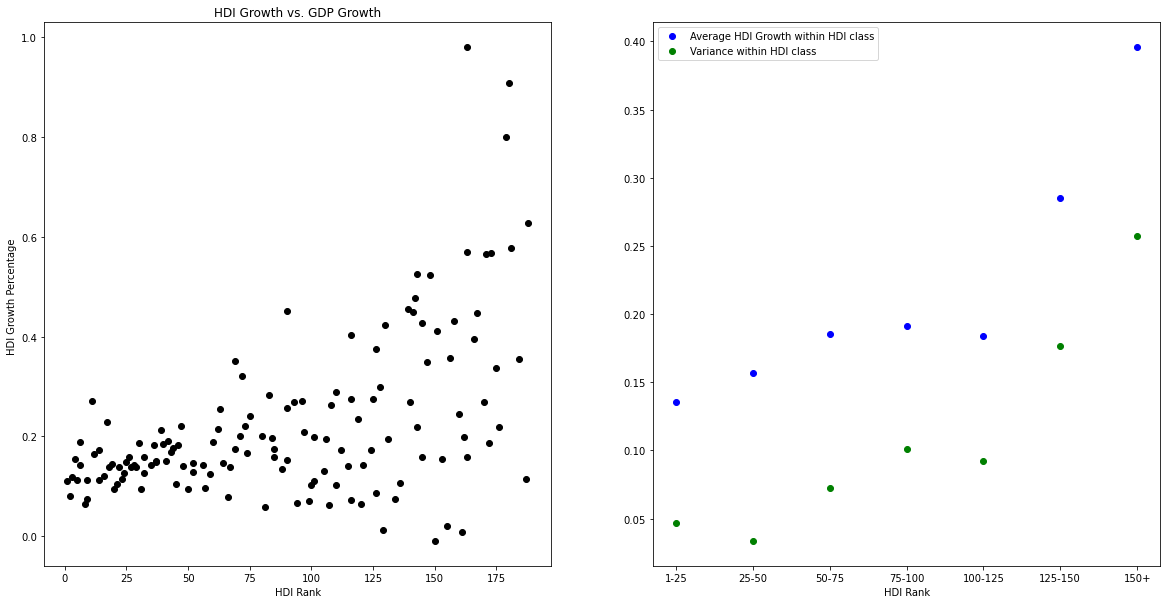

In [10]:
ttlGDP = "5 Year GDP Growth Rate (%)"

x = ["1-25","25-50","50-75","75-100","100-125","125-150", "150+"]
means_hdi = [econ_vs_hdi_1["Percent_Change"].mean(),econ_vs_hdi_2["Percent_Change"].mean(),econ_vs_hdi_3["Percent_Change"].mean(),econ_vs_hdi_4["Percent_Change"].mean(),econ_vs_hdi_5["Percent_Change"].mean(),
         econ_vs_hdi_6["Percent_Change"].mean(),econ_vs_hdi_7["Percent_Change"].mean()]

var_hdi = [econ_vs_hdi_1["Percent_Change"].std(),econ_vs_hdi_2["Percent_Change"].std(),econ_vs_hdi_3["Percent_Change"].std(),econ_vs_hdi_4["Percent_Change"].std(),
       econ_vs_hdi_5["Percent_Change"].std(),econ_vs_hdi_6["Percent_Change"].std(),econ_vs_hdi_7["Percent_Change"].std()]

fig = plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
econ_vs_hdi = econ_vs_hdi.sort_values(by=['HDI Rank'])
plt.scatter(econ_vs_hdi["HDI Rank"], econ_vs_hdi["Percent_Change"], color = 'black')
plt.xlabel("HDI Rank")
plt.ylabel("HDI Growth Percentage ")
plt.title("HDI Growth vs. GDP Growth")

plt.subplot(1,2,2)
plt.plot(x,means_hdi,'bo',label = "Average HDI Growth within HDI class")
plt.plot(x, var_hdi, 'go',label = "Variance within HDI class")
plt.xlabel("HDI Rank")
plt.legend(loc = 'upper left')
